# 📘 Assignment: Kernel SVM with Multiple Kernels (RBF, Polynomial, Sigmoid)

---

## 🎯 Objective
The objective of this assignment is to explore and compare the performance of **Kernel Support Vector Machine (SVM)** models with different kernels: **RBF**, **Polynomial**, and **Sigmoid** using the **Iris dataset**.

---

## 🧩 Assignment Questions

### ✅ Q1. Import Required Libraries
Import all necessary libraries such as:
- `pandas`, `numpy` for data handling  
- `matplotlib`, `seaborn` for visualization  
- `sklearn` for loading data, preprocessing, modeling, and evaluation

---

### ✅ Q2. Load the Dataset
- Load the **Iris dataset** using `sklearn.datasets.load_iris()`.
- Convert it into a Pandas DataFrame.
- Display the first 5 rows.

---

### ✅ Q3. Preprocess the Data
- Select two features (e.g., `sepal length (cm)` and `sepal width (cm)`) for visualization purposes.
- Extract the target variable.
- Perform train-test split (e.g., 75% train, 25% test) using `train_test_split`.
- Apply feature scaling using `StandardScaler`.

---

### ✅ Q4. Train SVM Models with Different Kernels
Train SVM classifiers using the following kernels:
- `rbf`
- `poly` (polynomial)
- `sigmoid`

> Use `SVC(kernel='rbf')`, `SVC(kernel='poly')`, and `SVC(kernel='sigmoid')` from `sklearn.svm`.

---

### ✅ Q5. Evaluate All Models
For each model:
- Predict the results on the test set
- Print the:
  - Confusion Matrix
  - Accuracy Score
  - Classification Report
- Visualize the confusion matrix using `seaborn.heatmap()`.

---

### ✅ Q6. Visualize Decision Boundaries (Optional)
- If only two features are used, plot the decision boundary for each kernel to compare their behavior visually.

---

### ✅ Q7. Compare the Kernels
- Create a comparison table of accuracy and observations.
- Which kernel performed best and why?
- Discuss any overfitting or underfitting behavior you observed.

---

## ✅ Submission Checklist
Before submitting, ensure:
- [ ] All code is executed and commented.
- [ ] All plots are labeled and easy to read.
- [ ] Markdown cells have clear and meaningful explanations.
- [ ] The notebook runs top to bottom without errors.
- [ ] File is named `yourname_kernel_svm_comparison.ipynb`.

---

> 📩 Submit the completed notebook as .ipynb file

---

### 🔒 End of Assignment — Excellent Job!

---


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [135]:
from sklearn.datasets import load_iris
dataset = load_iris()
# print(dataset)
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_vis = df[['sepal length (cm)', 'sepal width (cm)']]
y_vis = df['target']

x_vis_train, x_vis_test, y_vis_train, y_vis_test = train_test_split(x_vis, y_vis, test_size=0.2, random_state=42)

vis_scaler = StandardScaler()
x_vis_train_scaled = vis_scaler.fit_transform(x_vis_train)
x_vis_test_scaled = vis_scaler.transform(x_vis_test)

In [137]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [138]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm_decision_boundary(model, X, Y, title):

  h= 0.01 # Step size for mesh grid ; smaller value = Smoother decision boundary

  # determine the range range of values along each axis(X and Y)
  x_min , x_max = X[:, 0].min() -1 , X[:, 0].max() +1
  y_min , y_max = X[:, 1].min() -1 , X[:, 1].max() +1


  # Generate a grid of points with mesh step size 'h'
  # xx and yy contain the corrdinates of each point in the 2D space
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), ## horizontal grid
                       np.arange(y_min, y_max, h) # vertical grid
                       )


  # flatten the grid and stack it into coordinate pairs for predicition
  # shape becomes (num_points, 2) as required by the model

  grid_points = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions on the grid points
  Z = model.predict(grid_points)

  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
  plt.title(title)
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.grid(True)
  plt.show()

Polynomial Kernel Accuracy: 0.9666666666666667

Polynomial Kernel Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



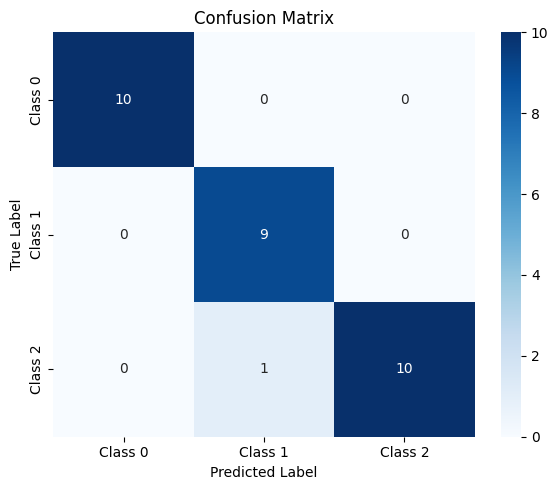

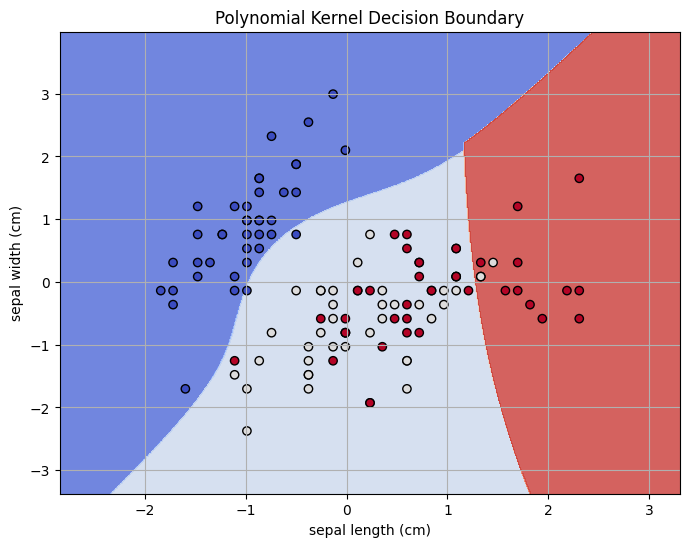

In [139]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train_scaled, y_train)
y_poly_pred = svm_poly.predict(x_test_scaled)

poly_accuracy_score = accuracy_score(y_test, y_poly_pred)
poly_confusion_matrix = confusion_matrix(y_test, y_poly_pred)
poly_classification_report = classification_report(y_test, y_poly_pred)

print("Polynomial Kernel Accuracy:", poly_accuracy_score)
print("\nPolynomial Kernel Classification Report:\n", poly_classification_report)

labels = ['Class 0', 'Class 1', 'Class 2']

plt.figure(figsize=(6, 5))
sns.heatmap(data = poly_confusion_matrix , annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

svm_poly_vis = SVC(kernel='poly')
svm_poly_vis.fit(x_vis_train_scaled, y_vis_train)

plot_svm_decision_boundary(
    model = svm_poly_vis,
    X = x_vis_train_scaled,
    Y = y_vis_train,
    title = 'Polynomial Kernel Decision Boundary'
)

RBF Kernel Accuracy: 1.0

RBF Kernel Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



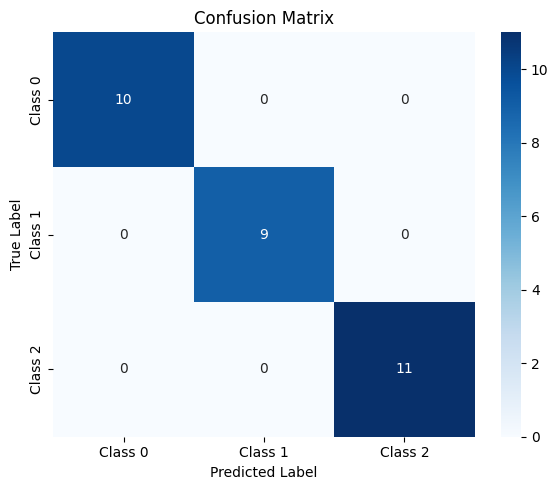

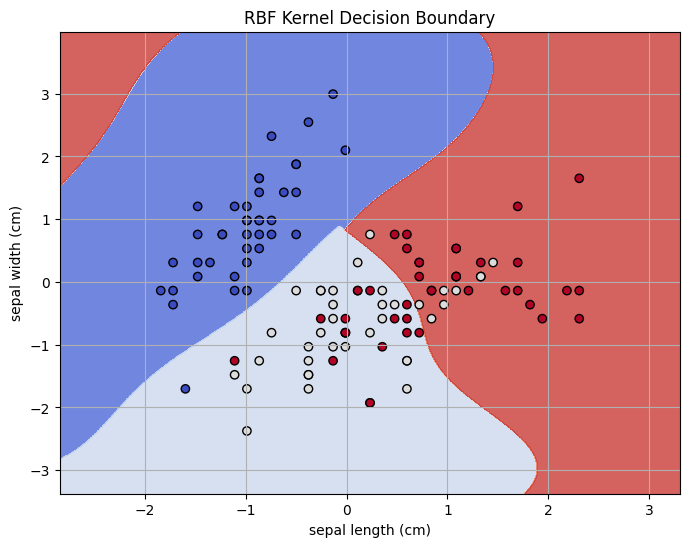

In [140]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train_scaled, y_train)
y_rbf_pred = svm_rbf.predict(x_test_scaled)

rbf_accuracy_score = accuracy_score(y_test, y_rbf_pred)
rbf_confusion_matrix = confusion_matrix(y_test, y_rbf_pred)
rbf_classification_score = classification_report(y_test, y_rbf_pred)

print("RBF Kernel Accuracy:", rbf_accuracy_score)
print("\nRBF Kernel Classification Report:\n", rbf_classification_score)

labels = ['Class 0', 'Class 1', 'Class 2']

plt.figure(figsize=(6, 5))
sns.heatmap(data = rbf_confusion_matrix , annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

svm_rbf_vis = SVC(kernel='rbf')
svm_rbf_vis.fit(x_vis_train_scaled, y_vis_train)

plot_svm_decision_boundary(
    model = svm_rbf_vis,
    X = x_vis_train_scaled,
    Y = y_vis_train,
    title = 'RBF Kernel Decision Boundary'
)

Sigmoid Kernel Accuracy: 0.9

Sigmoid Kernel Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



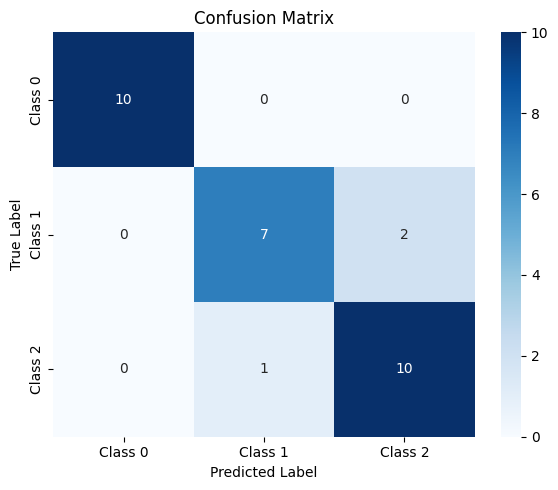

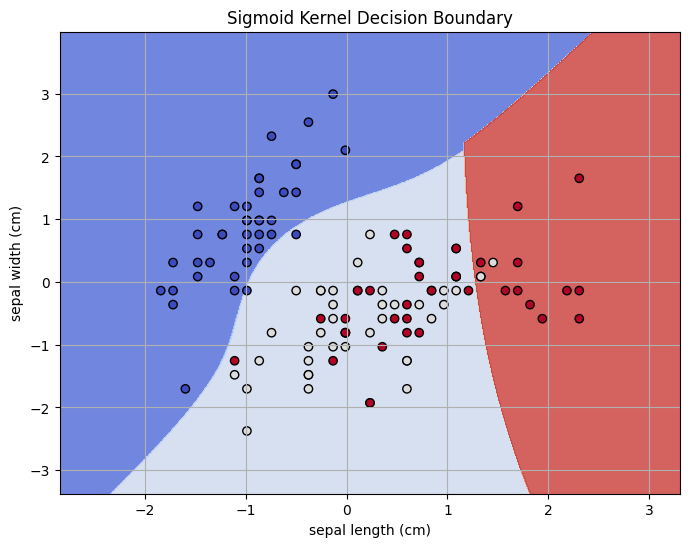

In [141]:
svm_sigmoid = SVC(kernel = 'sigmoid')
svm_sigmoid.fit(x_train_scaled, y_train)
y_sigmoid_pred = svm_sigmoid.predict(x_test_scaled)

sigmoid_accuracy_score = accuracy_score(y_test, y_sigmoid_pred)
sigmoid_confusion_matrix = confusion_matrix(y_test, y_sigmoid_pred)
sigmoid_classification_report = classification_report(y_test, y_sigmoid_pred)

print("Sigmoid Kernel Accuracy:", sigmoid_accuracy_score)
print("\nSigmoid Kernel Classification Report:\n", sigmoid_classification_report)

labels = ['Class 0', 'Class 1', 'Class 2']

plt.figure(figsize=(6, 5))
sns.heatmap(data = sigmoid_confusion_matrix , annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

svm_sigmoid_vis = SVC(kernel='poly')
svm_sigmoid_vis.fit(x_vis_train_scaled, y_vis_train)

plot_svm_decision_boundary(
    model = svm_sigmoid_vis,
    X = x_vis_train_scaled,
    Y = y_vis_train,
    title = 'Sigmoid Kernel Decision Boundary'
)

In [142]:
print(f"The accuracy score of the Polynomial Kernel is {poly_accuracy_score}")
print(f"The accuracy score of the RBF Kernel is {rbf_accuracy_score}")
print(f"The accuracy score of the Sigmoid Kernel is {sigmoid_accuracy_score}")

The accuracy score of the Polynomial Kernel is 0.9666666666666667
The accuracy score of the RBF Kernel is 1.0
The accuracy score of the Sigmoid Kernel is 0.9


In [143]:
print("The best performing kernel is the RBF kernel due to its perfect accuracy score, recall, precision score and most importantly the F1-score amongst all three of the kernels.")

The best performing kernel is the RBF kernel due to its perfect accuracy score, recall, precision score and most importantly the F1-score amongst all three of the kernels.
